In [3]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import time
import matplotlib.pyplot as plt
from mnist import *
import numpy as np
import warnings

warnings.simplefilter("ignore")

training_set_path = "D:\\Projects\\ml-experiments\\datasets\\mnist\\train-images-idx3-ubyte.gz"
train_labels_path = "D:\\Projects\\ml-experiments\\datasets\\mnist\\train-labels-idx1-ubyte.gz"

f_train = gzip.open(training_set_path)
f_train_labels = gzip.open(train_labels_path)

training_set = parse_idx(f_train)
training_labels = parse_idx(f_train_labels)

training_set_tr = training_set.reshape((60000, 784))

**Some utility function to reuse throughout experiment**

In [4]:
def get_random_digit(training_set, labels, digit):
    indexes = np.where(labels == digit)[0]
    return training_set[indexes[np.random.randint(0, len(indexes) - 1)]]

**Instead of building a BaggingClassifier and passing it a DecisionTreeClassifier, you can instead use the RandomForestClassifier class, which is more convenient and optimized for Decision Trees. The following code trains a Random Forest classifier with 100 trees (each limited to maximum 16 nodes), using all available CPU cores**

In [5]:
rnd_clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=16, n_jobs=-1)

start_time = time.time()
rnd_clf.fit(training_set_tr, training_labels)
elapsed = time.time() - start_time

print(f"Training the RandomForestClassifier took {elapsed} seconds")

a_nine = get_random_digit(training_set_tr, training_labels, 9)  # 784 Pixel intensities from 0 to 255! (Grayscale 8-bit image)
print(f"RandomForest Prediction: {rnd_clf.predict([a_nine])}")

Training the RandomForestClassifier took 3.961411952972412 seconds
RandomForest Prediction: [9]


**The Random Forest algorithm introduces extra randomness when growing trees; instead of searching for the very best feature when splitting a node (minimize impurity), itsearches for the best feature among a random subset of features. This results in a greater tree diversity**

**When you are growing a tree in a Random Forest, at each node only a random subset of the features is considered for splitting. It is possible to make trees even more random by also using random thresholds for each feature rather than searching for the best possible thresholds that minimize impurity (like regular Decision Trees do). A forest of such extremely random trees is simply called an Extremely Randomized Trees ensemble12 (or Extra-Trees for short).**

In [6]:
extra_trees = ExtraTreesClassifier(n_estimators=100, max_leaf_nodes=16, n_jobs=-1)

start_time = time.time()
extra_trees.fit(training_set_tr, training_labels)
elapsed = time.time() - start_time

print(f"Training the ExtraTreesClassifier took {elapsed} seconds")
print(f"ExtraTrees Prediction: {extra_trees.predict([a_nine])}")

Training the ExtraTreesClassifier took 5.413560390472412 seconds
ExtraTrees Prediction: [9]


**If you look at a single Decision Tree, important features are likely to appear closer to the root of the tree, while unimportant features will often appear closer to the leaves (or not at all). It is therefore possible to get an estimate of a feature’s importance by computing the average depth at which it appears across all trees in the forest. Scikit-Learn computes this automatically for every feature after training. You can access the result using the feature_importances_ variable.**

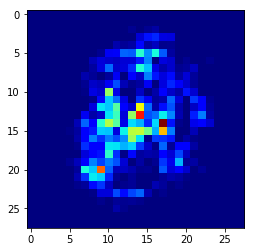

In [7]:
feature_importances = rnd_clf.feature_importances_  # The importance of every pixel. Shape (784,)
feature_importances_as_image = feature_importances.reshape(28, 28)
plt.imshow(feature_importances_as_image, cmap=plt.get_cmap("jet"), interpolation="nearest")
plt.show()